In [ ]:
import warnings

warnings.filterwarnings("ignore")

# Introducción a la Estadística Espacial

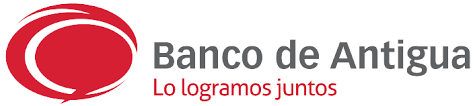

La **información espacial** nos ayuda a comprender diferente tipo de fenómenos: sanitarios, sociales, naturales, políticos, etc.

La **LEY de TOBLER** afirma que todo está relacionado con todo, sin embargo las cosas más cercanas están más relacionadas entre sí.

# <font color="#229966"> Operaciones con polígonos</font>

Hemos visto geometrías más sencillas el Punto y la Línea. Ahora  vamos a trabajar con polígonos, analizar las propiedades de éstas geometrías y el tipo de operaciones que permiten. A su vez, profundizaremos un poco más en las herramientas de visualización que nos ofrece la librería matplotlib.

Utilizaremos como ejemplo el set de datos de información censal por radio. Este dataset identifica cada radio censal con un polígono y ofrece información censal básica como el total de hogares, viviendas y población. 

También algunos indicadores como <font color="#229966">**NBI**</font>.

El código que identifica de manera únivoca el radio es el <font color="#229966">**CO_FRAC_RA**</font>, que es un concatenado de <font color="#229966">**COMUNA, FRACCION y RADIO**</font>. 

Las <font color="#229966">**fracciones** </font>y los <font color="#229966">**radios**</font> son unidades censales definidas por un espacio territorial con límites geográficos y una determinada cantidad de unidades de viviendas a relevar. 

Corresponden a distintos niveles de la estructura censal y determinar cargas equilibradas para cada uno de ellos asegura un mejor control de la cobertura territorial, facilita la distribución y recuperación de los materiales censales y determina en gran parte la calidad y el buen desarrollo del operativo Para mayor información pueden consultar aquí.


Los radios censales no siempre se adecúan a esta situación y tienen numerosos problemas. Sin embargo, constituyen la fuente de información más desagregada y de mayor extensión territorial sobre personas, hogares y vivendas con la que contamos.



In [1]:
#importamos las librerias de siempe
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from pathlib import Path

DATA_PATH = Path().cwd().parent.absolute() / "data"

In [3]:
# leemos el shapefile que utilizaremos como información principal
radios = gpd.read_file(DATA_PATH / "census/informacion_censal_por_radio_2010.shp")

# Suponiendo que tu DataFrame se llama radios
radios.rename(
    columns={"HOGARES": "TOTAL_HOGARES", "HOGARES_": "HOGARES_CON_NBI"}, inplace=True
)

# visualizo los primeros registros de mi variable radios
radios.head()

,RADIO_I,BARRIO,COMUNA,POBLACI,VIVIEND,TOTAL_HOGARES,HOGARES_CON_NBI,AREA_KM,geometry
0,1_1_1,RETIRO,1,336.0,82.0,65.0,19.0,1.798997,"POLYGON ((-58.37189 -34.59199, -58.37202 -34.5..."
1,1_12_1,SAN NICOLAS,1,341.0,365.0,116.0,25.0,0.018565,"POLYGON ((-58.38593 -34.60444, -58.38575 -34.6..."
2,1_12_10,SAN NICOLAS,1,296.0,629.0,101.0,1.0,0.044380,"POLYGON ((-58.37879 -34.60528, -58.37741 -34.6..."
3,1_12_11,SAN NICOLAS,1,528.0,375.0,136.0,7.0,0.366340,"POLYGON ((-58.36733 -34.60562, -58.36713 -34.6..."
4,1_12_2,SAN NICOLAS,1,229.0,445.0,129.0,16.0,0.018363,"POLYGON ((-58.38454 -34.60436, -58.38311 -34.6..."


In [4]:
# cambiamos el nombre de las filas por el radio correspondiente
radios.index = radios["RADIO_I"]

# luego conviene eliminar la variable RADIO_I
radios.drop(columns=["RADIO_I"], inplace=True)
radios

,BARRIO,COMUNA,POBLACI,VIVIEND,TOTAL_HOGARES,HOGARES_CON_NBI,AREA_KM,geometry
RADIO_I,,,,,,,,
1_1_1,RETIRO,1,336.0,82.0,65.0,19.0,1.798997,"POLYGON ((-58.37189 -34.59199, -58.37202 -34.5..."
1_12_1,SAN NICOLAS,1,341.0,365.0,116.0,25.0,0.018565,"POLYGON ((-58.38593 -34.60444, -58.38575 -34.6..."
1_12_10,SAN NICOLAS,1,296.0,629.0,101.0,1.0,0.044380,"POLYGON ((-58.37879 -34.60528, -58.37741 -34.6..."
1_12_11,SAN NICOLAS,1,528.0,375.0,136.0,7.0,0.366340,"POLYGON ((-58.36733 -34.60562, -58.36713 -34.6..."
1_12_2,SAN NICOLAS,1,229.0,445.0,129.0,16.0,0.018363,"POLYGON ((-58.38454 -34.60436, -58.38311 -34.6..."
...,...,...,...,...,...,...,...,...
1_3_12,RETIRO,1,561.0,170.0,181.0,70.0,0.011793,"POLYGON ((-58.38152 -34.58475, -58.38065 -34.5..."
1_3_11,RETIRO,1,745.0,223.0,267.0,95.0,0.016627,"POLYGON ((-58.38059 -34.58527, -58.37942 -34.5..."
1_3_10,RETIRO,1,745.0,261.0,261.0,86.0,0.009429,"POLYGON ((-58.38027 -34.58476, -58.37987 -34.5..."


In [5]:
tabla_comunas_barrios = (
    radios.groupby("COMUNA")["BARRIO"]
    .apply(lambda x: ", ".join(sorted(set(x))))
    .reset_index()
)
print(tabla_comunas_barrios)


   COMUNA                                             BARRIO
0       1  CONSTITUCION, MONSERRAT, PUERTO MADERO, RETIRO...
1      10  FLORESTA, MONTE CASTRO, VELEZ SARSFIELD, VERSA...
2      11  VILLA DEL PARQUE, VILLA DEVOTO, VILLA GRAL. MI...
3      12  COGHLAN, SAAVEDRA, VILLA PUEYRREDON, VILLA URQ...
4      13                        BELGRANO, COLEGIALES, NUÑEZ
5      14                                            PALERMO
6      15  AGRONOMIA, CHACARITA, PARQUE CHAS, PATERNAL, V...
7       2                                           RECOLETA
8       3                           BALVANERA, SAN CRISTOBAL
9       4    BARRACAS, BOCA, NUEVA POMPEYA, PARQUE PATRICIOS
10      5                                     ALMAGRO, BOEDO
11      6                                          CABALLITO
12      7                           FLORES, PARQUE CHACABUCO
13      8       VILLA LUGANO, VILLA RIACHUELO, VILLA SOLDATI
14      9              LINIERS, MATADEROS, PARQUE AVELLANEDA


- **apply(...)**: Aplica una función a cada grupo de la columna 'BARRIO'.
 - **lambda x**: ...: Define una función anónima (lambda) que toma un argumento x. Aquí, x es una serie de valores de la columna 'BARRIO' para un grupo particular de 'COMUNA'.
 - **set(x)**: Convierte x en un conjunto (set), eliminando los valores duplicados.
 - **sorted(set(x))**: Ordena los elementos del conjunto en orden alfabético.
 - **', '.join(...)**: Une los elementos ordenados en una sola cadena de texto, separando cada elemento con una coma y un espacio.

In [6]:
#convertirmos todo nuestro dataset a una proyeccion con unidades en metros. Luego veremos en mas detalle 
#convertirmos todo nuestro dataset a una proyeccion con unidades en metros. Luego veremos en mas detalle 
radios = radios.to_crs(epsg=3857)
radios

,BARRIO,COMUNA,POBLACI,VIVIEND,TOTAL_HOGARES,HOGARES_CON_NBI,AREA_KM,geometry
RADIO_I,,,,,,,,
1_1_1,RETIRO,1,336.0,82.0,65.0,19.0,1.798997,"POLYGON ((-6497929.484 -4108572.020, -6497943...."
1_12_1,SAN NICOLAS,1,341.0,365.0,116.0,25.0,0.018565,"POLYGON ((-6499491.512 -4110255.197, -6499471...."
1_12_10,SAN NICOLAS,1,296.0,629.0,101.0,1.0,0.044380,"POLYGON ((-6498696.826 -4110369.483, -6498543...."
1_12_11,SAN NICOLAS,1,528.0,375.0,136.0,7.0,0.366340,"POLYGON ((-6497420.916 -4110414.929, -6497399...."
1_12_2,SAN NICOLAS,1,229.0,445.0,129.0,16.0,0.018363,"POLYGON ((-6499336.819 -4110244.172, -6499178...."
...,...,...,...,...,...,...,...,...
1_3_12,RETIRO,1,561.0,170.0,181.0,70.0,0.011793,"POLYGON ((-6499001.209 -4107592.064, -6498904...."
1_3_11,RETIRO,1,745.0,223.0,267.0,95.0,0.016627,"POLYGON ((-6498897.994 -4107663.258, -6498767...."
1_3_10,RETIRO,1,745.0,261.0,261.0,86.0,0.009429,"POLYGON ((-6498861.378 -4107593.705, -6498817...."


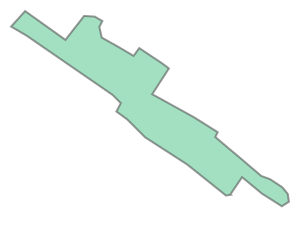

In [7]:
# Analizamos la geometria de algunos radios
radios.loc["1_3_10", "geometry"]

In [8]:
barrio1310 = radios.loc["1_3_10", "BARRIO"]
print(barrio1310)

RETIRO


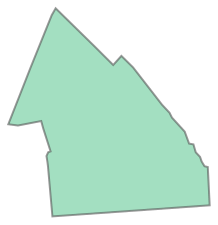

In [9]:
radios.loc["7_18_11", "geometry"]

In [10]:
barrio71811 = radios.loc["7_18_11", "BARRIO"]
print(barrio71811)

FLORES


In [11]:
type(radios.loc["1_14_2"].geometry)

shapely.geometry.polygon.Polygon

In [12]:
# los polígonos tiene un area, hallemos el área de Flores
flores = radios.loc["7_18_11"].geometry
flores.area

23747.853679744967

In [13]:
#también un perímetro
flores.length

693.9812785735852

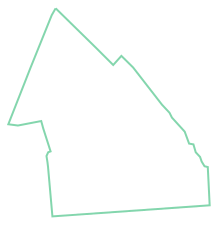

In [14]:
#podemos graficar el perímetro, se denomina exterior
flores.exterior

In [15]:
radios["PERIMETRO"] = radios.geometry.length
radios

,BARRIO,COMUNA,POBLACI,VIVIEND,TOTAL_HOGARES,HOGARES_CON_NBI,AREA_KM,geometry,PERIMETRO
RADIO_I,,,,,,,,,
1_1_1,RETIRO,1,336.0,82.0,65.0,19.0,1.798997,"POLYGON ((-6497929.484 -4108572.020, -6497943....",17530.094484
1_12_1,SAN NICOLAS,1,341.0,365.0,116.0,25.0,0.018565,"POLYGON ((-6499491.512 -4110255.197, -6499471....",661.655424
1_12_10,SAN NICOLAS,1,296.0,629.0,101.0,1.0,0.044380,"POLYGON ((-6498696.826 -4110369.483, -6498543....",1278.061937
1_12_11,SAN NICOLAS,1,528.0,375.0,136.0,7.0,0.366340,"POLYGON ((-6497420.916 -4110414.929, -6497399....",3087.214915
1_12_2,SAN NICOLAS,1,229.0,445.0,129.0,16.0,0.018363,"POLYGON ((-6499336.819 -4110244.172, -6499178....",661.734561
...,...,...,...,...,...,...,...,...,...
1_3_12,RETIRO,1,561.0,170.0,181.0,70.0,0.011793,"POLYGON ((-6499001.209 -4107592.064, -6498904....",1032.837342
1_3_11,RETIRO,1,745.0,223.0,267.0,95.0,0.016627,"POLYGON ((-6498897.994 -4107663.258, -6498767....",999.440136
1_3_10,RETIRO,1,745.0,261.0,261.0,86.0,0.009429,"POLYGON ((-6498861.378 -4107593.705, -6498817....",866.000676


In [16]:
# Ordenar la base en orden creciente de perímetros
radios_perimetro_asc = radios.sort_values(by="PERIMETRO", ascending=True)
radios_perimetro_asc

,BARRIO,COMUNA,POBLACI,VIVIEND,TOTAL_HOGARES,HOGARES_CON_NBI,AREA_KM,geometry,PERIMETRO
RADIO_I,,,,,,,,,
1_2_10,RETIRO,1,327.0,59.0,88.0,16.0,0.004597,"POLYGON ((-6498658.641 -4107506.812, -6498690....",356.300648
7_22_12,PARQUE CHACABUCO,7,582.0,298.0,256.0,0.0,0.006030,"POLYGON ((-6505463.784 -4114254.900, -6505407....",402.122112
1_2_15,RETIRO,1,757.0,154.0,278.0,97.0,0.005744,"POLYGON ((-6498443.345 -4107647.118, -6498483....",411.360008
2_25_1,RECOLETA,2,570.0,458.0,312.0,2.0,0.007387,"POLYGON ((-6502379.103 -4108611.059, -6502371....",419.973280
6_12_1,CABALLITO,6,522.0,326.0,256.0,3.0,0.005577,"POLYGON ((-6506336.094 -4112136.425, -6506313....",421.489100
...,...,...,...,...,...,...,...,...,...
1_13_14,PUERTO MADERO,1,1960.0,855.0,659.0,177.0,3.804422,"POLYGON ((-6496241.210 -4109051.607, -6496230....",14889.446894
4_18_1,BOCA,4,74.0,45.0,45.0,40.0,2.031572,"POLYGON ((-6495563.938 -4112326.421, -6495521....",15133.069112
13_11_1,BELGRANO,13,568.0,220.0,172.0,7.0,2.238113,"POLYGON ((-6506647.761 -4102785.686, -6506729....",17236.802318


In [17]:
# Ordenar en orden decreciente de áreas
radios_area_desc = radios.sort_values(by="AREA_KM", ascending=False)
radios_area_desc

,BARRIO,COMUNA,POBLACI,VIVIEND,TOTAL_HOGARES,HOGARES_CON_NBI,AREA_KM,geometry,PERIMETRO
RADIO_I,,,,,,,,,
1_13_14,PUERTO MADERO,1,1960.0,855.0,659.0,177.0,3.804422,"POLYGON ((-6496241.210 -4109051.607, -6496230....",14889.446894
14_10_2,PALERMO,14,0.0,0.0,0.0,0.0,3.408497,"POLYGON ((-6502928.118 -4104712.193, -6502973....",17853.862521
14_10_1,PALERMO,14,25.0,21.0,6.0,0.0,2.902673,"POLYGON ((-6504872.094 -4104589.482, -6504883....",12222.585188
8_13_1,VILLA SOLDATI,8,45.0,11.0,20.0,14.0,2.814782,"POLYGON ((-6506592.973 -4120597.276, -6506647....",9213.613175
8_12_7,VILLA RIACHUELO,8,826.0,272.0,278.0,11.0,2.814296,"POLYGON ((-6508667.241 -4122390.338, -6508594....",9774.837601
...,...,...,...,...,...,...,...,...,...
1_2_18,RETIRO,1,480.0,126.0,148.0,33.0,0.005326,"POLYGON ((-6498628.831 -4107474.632, -6498622....",437.088447
3_21_9,SAN CRISTOBAL,3,416.0,256.0,188.0,1.0,0.005169,"POLYGON ((-6500262.598 -4113145.196, -6500239....",435.471248
1_3_8,RETIRO,1,797.0,286.0,257.0,89.0,0.004935,"POLYGON ((-6498661.738 -4107601.426, -6498441....",784.611906


In [18]:
#el tipo es especifico, no es solo una linea
type(flores.exterior)

shapely.geometry.polygon.LinearRing

In [19]:
#y un interior
flores.interiors

In [20]:
#veremos mas adelante los interiores, solo sepamos que este poligono al no tener "islas" no los tiene
list(flores.interiors)

[]

# <font color="#229966"> Ejercicio 5 </font>

a) Elegir un radio censal

b) Visualizar su forma

c) Calcular su perímetro y su área en metros.


# <font color="#229966">Coropletas</font >

Una coropleta, abreviatura de "coropletograma", es un tipo de mapa temático que utiliza diferentes tonos o colores para representar diferentes valores de una variable dentro de áreas geográficas. La idea es que áreas contiguas con valores similares de la variable estudiada tengan el mismo color o tono, lo que facilita la identificación de patrones y variaciones en la distribución espacial de esa variable.

Por ejemplo, si estuviéramos representando la densidad de población de diferentes estados en un país utilizando una coropleta, podríamos usar tonos más oscuros para indicar áreas con una mayor densidad de población y tonos más claros para áreas con una menor densidad de población. Esto nos permitiría visualizar rápidamente las áreas más densamente pobladas y las menos densamente pobladas en el país.

<Axes: >

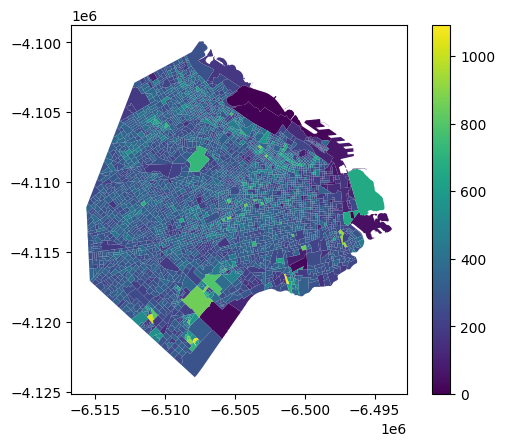

In [21]:
#podemos hacer una coropleta con una sola linea
radios.plot(column="TOTAL_HOGARES", legend=True)

<Axes: >

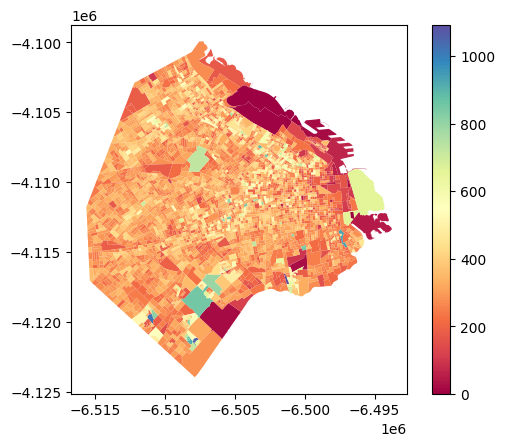

In [22]:
#podemos elegir otra paleta de colores
radios.plot(column="TOTAL_HOGARES", cmap="Spectral", legend=True)

<Axes: >

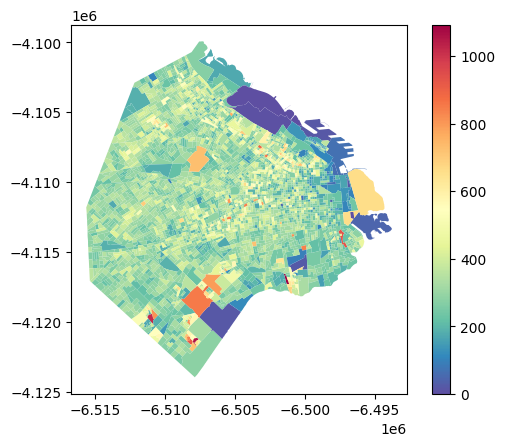

In [23]:
#cada paleta tiene su inverso
radios.plot(column="TOTAL_HOGARES", cmap="Spectral_r", legend=True)

In [24]:
# creamos una variable de porcentaje de hogares con NBI
radios["NBI"] = 100 * radios.HOGARES_CON_NBI / (radios.TOTAL_HOGARES)
radios.head()

,BARRIO,COMUNA,POBLACI,VIVIEND,TOTAL_HOGARES,HOGARES_CON_NBI,AREA_KM,geometry,PERIMETRO,NBI
RADIO_I,,,,,,,,,,
1_1_1,RETIRO,1,336.0,82.0,65.0,19.0,1.798997,"POLYGON ((-6497929.484 -4108572.020, -6497943....",17530.094484,29.230769
1_12_1,SAN NICOLAS,1,341.0,365.0,116.0,25.0,0.018565,"POLYGON ((-6499491.512 -4110255.197, -6499471....",661.655424,21.551724
1_12_10,SAN NICOLAS,1,296.0,629.0,101.0,1.0,0.044380,"POLYGON ((-6498696.826 -4110369.483, -6498543....",1278.061937,0.990099
1_12_11,SAN NICOLAS,1,528.0,375.0,136.0,7.0,0.366340,"POLYGON ((-6497420.916 -4110414.929, -6497399....",3087.214915,5.147059
1_12_2,SAN NICOLAS,1,229.0,445.0,129.0,16.0,0.018363,"POLYGON ((-6499336.819 -4110244.172, -6499178....",661.734561,12.403101


In [25]:
#cuidado, que hay 0 en el denominador
radios.TOTAL_HOGARES.min()

0.0

In [26]:
#esto genera que haya nulls en NBI porque no se puede dividir por 0
radios.NBI.isnull().sum()

2

In [27]:
# borramos los NA
radios_nbi = radios.dropna(axis="index", subset=["NBI"])
radios_nbi.shape

(3552, 10)

<Axes: >

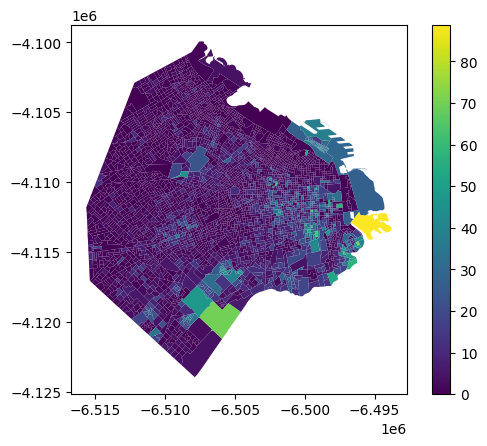

In [28]:
radios_nbi.plot(column="NBI", legend=True)

# <font color="#229966">Leemos datos de ríos y espacios verdes</font>





In [29]:
#vamos a cargar unos shapes que sirven de insumo para la visualizacion
rios = gpd.read_file(DATA_PATH / "rivers/rios.shp")
rios.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [30]:
#vamos a cargar unos shapes que sirven de insumo para la visualizacion

verdes = gpd.read_file(DATA_PATH / "rivers/verdes.shp")
verdes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Las siguientes dos intrucciones están asegurando que <font color="#229966">**todos los datos estén en la misma proyección espacial**</font>.


Cuando trabajas con datos geoespaciales, es muy importante que todas las capas estén en la misma proyección espacial
para que se alineen correctamente en un mapa y  <font color="#229966">**para que las mediciones espaciales sean precisas**</font>.



In [31]:
verdes = verdes.to_crs(radios.crs)
rios = rios.to_crs(radios.crs)

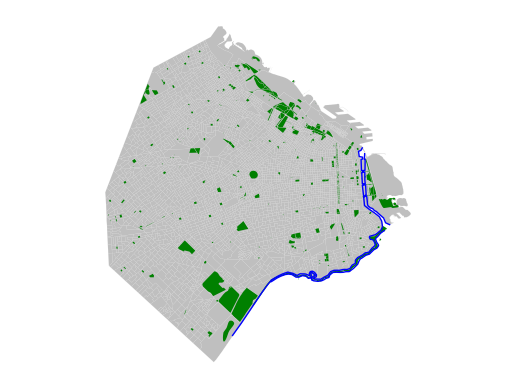

In [32]:
# generamos el espacio para una figura
f, ax = plt.subplots(1)
# graficamos el mapa con gris  y borde blanco con una trasparencia del 50%
radios.plot(linewidth=0.1, facecolor="grey", edgecolor="white", ax=ax, alpha=0.5)
# agregamos al plot los rios y los parques
rios.plot(ax=ax, color="blue", linewidth=1)  # rios en azul
verdes.plot(ax=ax, color="green")  # parques en verde
# plt.axis('equal') garantiza que la escala de los ejes x e y sea proporcional,
# lo que ayuda a mantener la precisión y la integridad de la representación geoespacial en el mapa.
plt.axis("equal")
ax.set_axis_off()  # elimina los ejes del borde.

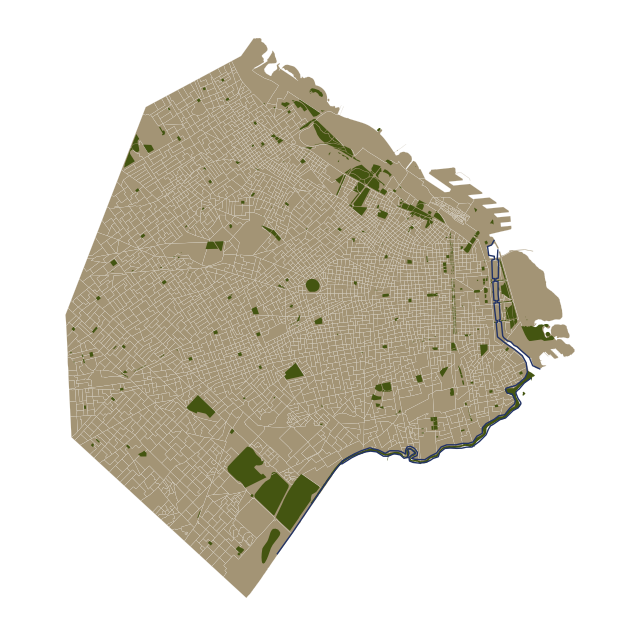

In [33]:
# Personalizamos nuestros colores en un mapa
f, ax = plt.subplots(1, figsize=(8, 8))
radios.plot(linewidth=0.1, facecolor="#998866", edgecolor="white", ax=ax, alpha=0.9)
rios.plot(ax=ax, color="#223366", linewidth=1)
verdes.plot(ax=ax, color="#445511")
plt.axis("equal")
ax.set_axis_off()
plt.show()


# <font color="#229966">Analisis de NBI por diferentes unidades espaciales</font>

Comentamos que los radios no siempre constituyen unidades espaciales que den cuenta de los procesos subyacentes que inciden en nuestros datos. Es por eso que muchas veces vamos a querer partir de radios censales y llevar los datos a otras unidades espaciales. 

Procuraremos realizar un análisis de la distribución de NBI por comuna.

In [34]:
radios_nbi.NBI.describe()

count    3552.000000
mean        6.151398
std         9.595624
min         0.000000
25%         0.605603
50%         1.884256
75%         7.588378
max        88.888889
Name: NBI, dtype: float64

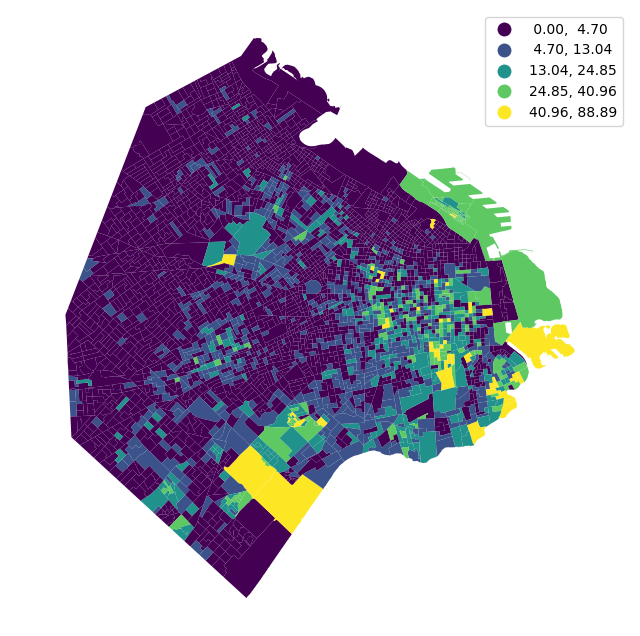

In [35]:
f, ax = plt.subplots(1, figsize=(8, 8))
# realizamos el mismo mapa, ahora graficando por quintiles
radios_nbi.plot(
    column="NBI", linewidth=0.1, ax=ax, scheme="Fisher_Jenks", k=5, legend=True
)
plt.axis("equal")
ax.set_axis_off()


## Fisher Jenks

Fisher Jenks (Fisher-Jenks Natural Breaks Classification) es un método de clasificación que optimiza la agrupación de datos en clases de manera que se minimiza la varianza dentro de cada clase y se maximiza la varianza entre las clases. Este método es muy popular en la cartografía para crear mapas choropleth, ya que destaca las diferencias naturales en los datos.

# <font color="#229966">Veamos los datos en Tablas</font>

In [36]:
# nosotros ya sabemos de la clase anterior como obtener un estadístico resumen agrupado por una variable común
# calculamos como estadístico la media del NBI
tabla_nbi = radios_nbi.loc[:, ["COMUNA", "NBI"]].groupby("COMUNA").mean()
tabla_nbi.sort_values(by="NBI", ascending=False).head(15)

,NBI
COMUNA,
1,15.711973
4,12.827940
3,12.194240
8,9.443664
7,7.814530
5,6.442652
15,4.149298
9,3.831654
10,3.459473


In [37]:
# calculamos como estadístico el desvio estandar del NBI
tabla_nbi2 = radios_nbi.loc[:, ["COMUNA", "NBI"]].groupby("COMUNA").std()
tabla_nbi2.sort_values(by="NBI", ascending=False).head(15)

# Exportar el DataFrame a un archivo CSV
tabla_nbi2.to_csv(
    DATA_PATH / "nbi_x_comuna.csv", index=False
)  # guardamos esta tabla más adelante la vamos a usar!

Vamos a hacer un ejemplo sencillo **agrupando y promediando el NBI por comuna**

In [38]:
# creemos un data frame sencillo para probar y luego si funciona podemos extrapolar
dt = pd.DataFrame(
    {"COMUNA": [1, 1, 2, 2], "NBI": [50.0, 10.0, 90.0, 10], "T_HOGAR": [0, 2, 100, 2]}
)
dt


,COMUNA,NBI,T_HOGAR
0,1,50.0,0
1,1,10.0,2
2,2,90.0,100
3,2,10.0,2


In [39]:
dt.loc[:, ["COMUNA", "NBI"]].groupby("COMUNA").agg(np.average)

,NBI
COMUNA,
1,30.0
2,50.0


In [40]:
x = dt.loc[dt.COMUNA == 2]
x = np.average(a=x.NBI, weights=x.T_HOGAR, axis=0)
x

88.43137254901961

In [41]:
# Acá ilustramos el cálculo realizado
(90 * 100 + 10 * 2) / 102

88.43137254901961

In [42]:
# definimos una funcion que tome un dataset, que va a ser el dataset de cada comuna
# y devuelva

# Produce un promedio ponderado de NBI a partir del total de HOGARES
# Argumentos
#  ---------
# dt     : pandas.DataFrame
#          DataFrame que contiene los radios con NBI por COMUNA

#   Devuelve
#  -------
#   average : float
#      El promedio ponderado de NBI por el total de hogares


def promedio_ponderado(dt):
    return np.average(a=dt["NBI"], weights=dt["T_HOGAR"])


In [43]:
# Aplicar la función de agregación
resultado = dt.groupby("COMUNA").apply(promedio_ponderado)
resultado

/var/folders/15/t0shdgps3svgcb76wngkj7b40000gn/T/ipykernel_3218/1780281095.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultado = dt.groupby("COMUNA").apply(promedio_ponderado)


COMUNA
1    10.000000
2    88.431373
dtype: float64

**Desglose de la instrucción**

**reset_index(name='NBI')**: Este método se aplica a una Serie o DataFrame y se utiliza para restablecer el índice, convirtiendo los índices actuales en columnas.

**name='NBI'**: Este parámetro asigna un nombre a la nueva columna creada a partir de los valores de la Serie. Esto es útil cuando la Serie se convierte en un DataFrame, ya que el nombre especificado ('NBI') se utiliza para la columna de valores de la Serie.

In [44]:
import pandas as pd


def promedio_ponderado(dt):
    return np.average(a=dt["NBI"], weights=dt["TOTAL_HOGARES"])


tabla_nbi_pon = radios_nbi.groupby("COMUNA").apply(promedio_ponderado)
tabla_nbi_pon = tabla_nbi_pon.reset_index(name="NBI_prom")
tabla_nbi_pon = tabla_nbi_pon.sort_values(by="NBI_prom", ascending=False)
tabla_nbi_pon


/var/folders/15/t0shdgps3svgcb76wngkj7b40000gn/T/ipykernel_3218/1447557806.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tabla_nbi_pon = radios_nbi.groupby("COMUNA").apply(promedio_ponderado)


,COMUNA,NBI_prom
0,1,15.898328
9,4,12.658427
8,3,11.877399
13,8,11.308501
12,7,8.639839
10,5,6.053666
6,15,4.284827
14,9,4.150810
1,10,3.496981
5,14,2.350558


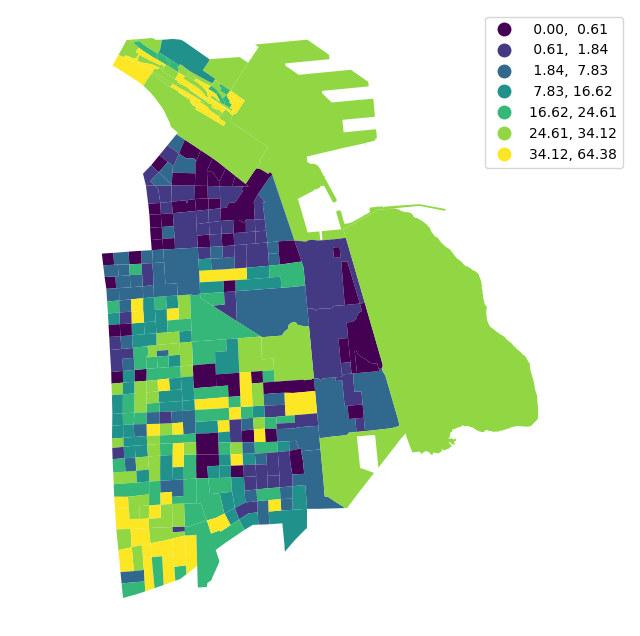

In [45]:
# realizamos el  mapa, ahora graficando por heptiles para ver la disparidad de la Comuna 1
f, ax = plt.subplots(1, figsize=(8, 8))
radios_nbi.loc[radios_nbi.COMUNA == "1", :].plot(
    column="NBI", linewidth=0.3, ax=ax, scheme="quantiles", k=7, legend=True
)
plt.axis("equal")
ax.set_axis_off()


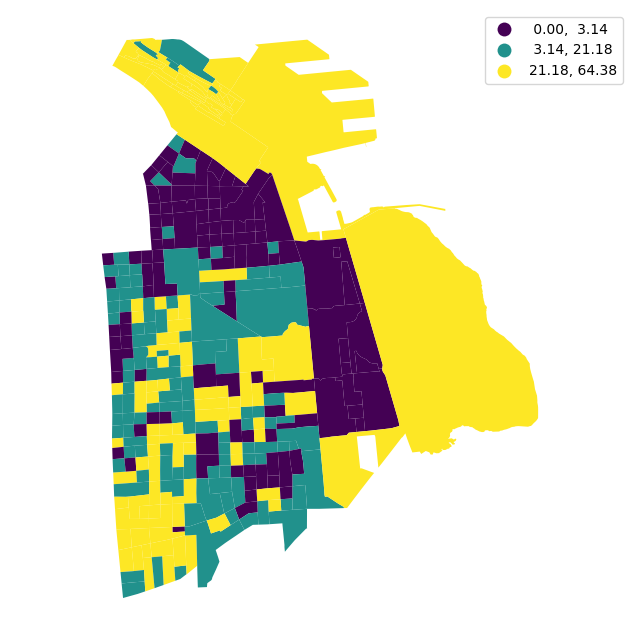

In [46]:
# realizamos el mismo mapa, ahora graficando por terciles para ver la disparidad de la Comuna 1
f, ax = plt.subplots(1, figsize=(8, 8))
radios_nbi.loc[radios_nbi.COMUNA == "1", :].plot(
    column="NBI", linewidth=0.1, ax=ax, scheme="quantiles", k=3, legend=True
)
plt.axis("equal")
ax.set_axis_off()

Se puede observar que la Comuna 1 tiene Retiro y Puerto Madero como sectores con muy bajo NBI.

Podemos <font color="#229966">**cambiar la estrategia de visualización**</font> y pasar a usar puntos. Esto nos permite visualizar 2 variables al mismo tiempo. Para ello cambiamos las geometrias de poligonos a puntos obteniendo el <font color="#229966">**centroide de cada poligono**</font>.

In [47]:
radios_nbi

,BARRIO,COMUNA,POBLACI,VIVIEND,TOTAL_HOGARES,HOGARES_CON_NBI,AREA_KM,geometry,PERIMETRO,NBI
RADIO_I,,,,,,,,,,
1_1_1,RETIRO,1,336.0,82.0,65.0,19.0,1.798997,"POLYGON ((-6497929.484 -4108572.020, -6497943....",17530.094484,29.230769
1_12_1,SAN NICOLAS,1,341.0,365.0,116.0,25.0,0.018565,"POLYGON ((-6499491.512 -4110255.197, -6499471....",661.655424,21.551724
1_12_10,SAN NICOLAS,1,296.0,629.0,101.0,1.0,0.044380,"POLYGON ((-6498696.826 -4110369.483, -6498543....",1278.061937,0.990099
1_12_11,SAN NICOLAS,1,528.0,375.0,136.0,7.0,0.366340,"POLYGON ((-6497420.916 -4110414.929, -6497399....",3087.214915,5.147059
1_12_2,SAN NICOLAS,1,229.0,445.0,129.0,16.0,0.018363,"POLYGON ((-6499336.819 -4110244.172, -6499178....",661.734561,12.403101
...,...,...,...,...,...,...,...,...,...,...
1_3_12,RETIRO,1,561.0,170.0,181.0,70.0,0.011793,"POLYGON ((-6499001.209 -4107592.064, -6498904....",1032.837342,38.674033
1_3_11,RETIRO,1,745.0,223.0,267.0,95.0,0.016627,"POLYGON ((-6498897.994 -4107663.258, -6498767....",999.440136,35.580524
1_3_10,RETIRO,1,745.0,261.0,261.0,86.0,0.009429,"POLYGON ((-6498861.378 -4107593.705, -6498817....",866.000676,32.950192


In [48]:
# seleccionamos Comuna 1 y algunas variables
centroides = radios_nbi.loc[radios_nbi.COMUNA == "1", ["NBI", "POBLACI", "geometry"]]
centroides.head()


,NBI,POBLACI,geometry
RADIO_I,,,
1_1_1,29.230769,336.0,"POLYGON ((-6497929.484 -4108572.020, -6497943...."
1_12_1,21.551724,341.0,"POLYGON ((-6499491.512 -4110255.197, -6499471...."
1_12_10,0.990099,296.0,"POLYGON ((-6498696.826 -4110369.483, -6498543...."
1_12_11,5.147059,528.0,"POLYGON ((-6497420.916 -4110414.929, -6497399...."
1_12_2,12.403101,229.0,"POLYGON ((-6499336.819 -4110244.172, -6499178...."


La instrucción radios_metros = radios.to_crs(epsg=3857) se utiliza para **transformar las coordenadas geográficas (latitud y longitud)** de un GeoDataFrame llamado radios **al sistema de coordenadas EPSG 3857**, que es un sistema de proyección cartográfica comúnmente utilizado en aplicaciones web y servicios de mapas en línea, como Google Maps.


In [49]:
import geopandas as gpd


projected_crs = "EPSG:32633"

# Proyectamos el  GeoDataFrame a CRS
centroides_projected = centroides.to_crs(projected_crs)

# calculasmos los centroides proyectados a  CRS
centroides_projected["geometry"] = centroides_projected.geometry.centroid

# Podemos volver a la representacion original
centroides = centroides_projected.to_crs(centroides.crs)
centroides.head()

,NBI,POBLACI,geometry
RADIO_I,,,
1_1_1,29.230769,336.0,POINT (-6497524.308 -4107913.615)
1_12_1,21.551724,341.0,POINT (-6499410.622 -4110336.758)
1_12_10,0.990099,296.0,POINT (-6498481.069 -4110364.771)
1_12_11,5.147059,528.0,POINT (-6497898.187 -4110426.836)
1_12_2,12.403101,229.0,POINT (-6499252.716 -4110324.572)


Podemos visualizar esto en forma de puntos a partir de los centroides, lo que nos permite visualizar dos variables usando tamaños y colores

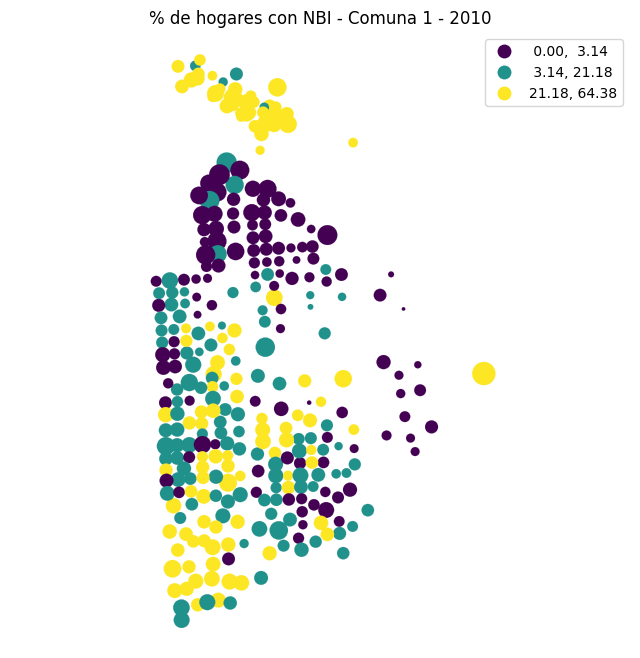

In [50]:
# usamos markersize para mostrar la poblacion
f, ax = plt.subplots(1, figsize=(8, 8))
centroides.plot(
    column="NBI",
    linewidth=0.1,
    ax=ax,
    scheme="quantiles",
    k=3,
    legend=True,
    markersize=centroides.POBLACI / 7,
)
plt.axis("equal")
ax.set_axis_off()
ax.set_title("% de hogares con NBI - Comuna 1 - 2010")
f.savefig(DATA_PATH / "centroides_comuna1.png")

# <font color="#229966">La Cartografia de comunas</font>

Ya tenemos los datos, pero necesitamos una cartografia de comunas
Si bien existe y podemos bajarla, podríamos crearla a partir de agregar o disolver unidades espaciales existentes


In [51]:
#un nuevo GeoDataFrame comunas donde cada fila representa una comuna, 
 #y la geometría de cada fila es el resultado de combinar (disolver) todos los polígonos de radios 
# que pertenecen a esa comuna en una sola geometría.

comunas = radios.dissolve("COMUNA")
comunas.head()

,geometry,BARRIO,POBLACI,VIVIEND,TOTAL_HOGARES,HOGARES_CON_NBI,AREA_KM,PERIMETRO,NBI
COMUNA,,,,,,,,,
1,"POLYGON ((-6499952.348 -4113979.950, -6499965....",RETIRO,336.0,82.0,65.0,19.0,1.798997,17530.094484,29.230769
10,"POLYGON ((-6513783.193 -4114206.566, -6513834....",VILLA REAL,641.0,300.0,250.0,7.0,0.077003,1376.617366,2.800000
11,"POLYGON ((-6514150.142 -4112320.108, -6514187....",VILLA DEVOTO,1032.0,370.0,324.0,0.0,0.146151,2098.385626,0.000000
12,"POLYGON ((-6512711.593 -4108626.941, -6512726....",SAAVEDRA,581.0,216.0,191.0,1.0,0.277458,3062.557126,0.523560
13,"POLYGON ((-6508737.747 -4105811.838, -6508830....",NUÑEZ,733.0,393.0,296.0,1.0,0.089419,1467.402591,0.337838


In [52]:
#vemos que los datos no nos sirvem porque no son un agregado, sino los del primer registro de cada comuna. entonces los eliminamos
Comunas = comunas.reindex(columns = ["geometry"])
Comunas.head()

,geometry
COMUNA,
1,"POLYGON ((-6499952.348 -4113979.950, -6499965...."
10,"POLYGON ((-6513783.193 -4114206.566, -6513834...."
11,"POLYGON ((-6514150.142 -4112320.108, -6514187...."
12,"POLYGON ((-6512711.593 -4108626.941, -6512726...."
13,"POLYGON ((-6508737.747 -4105811.838, -6508830...."


<Axes: >

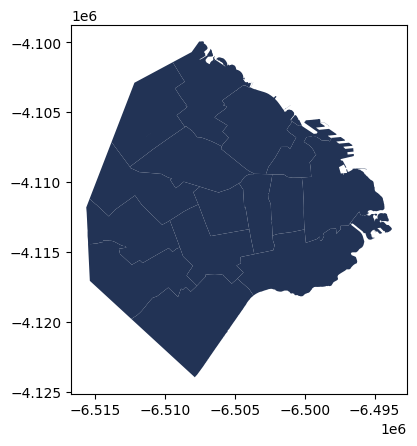

In [53]:
# graficamos 
comunas.plot(color="#223355")

In [54]:
# Restablecemos el índice para convertir `COMUNA` en una columna
comunas = comunas.reset_index()
comunas = comunas[["geometry", "COMUNA", "BARRIO"]]
comunas

,geometry,COMUNA,BARRIO
0,"POLYGON ((-6499952.348 -4113979.950, -6499965....",1,RETIRO
1,"POLYGON ((-6513783.193 -4114206.566, -6513834....",10,VILLA REAL
2,"POLYGON ((-6514150.142 -4112320.108, -6514187....",11,VILLA DEVOTO
3,"POLYGON ((-6512711.593 -4108626.941, -6512726....",12,SAAVEDRA
4,"POLYGON ((-6508737.747 -4105811.838, -6508830....",13,NUÑEZ
5,"POLYGON ((-6505565.651 -4107955.211, -6505599....",14,PALERMO
6,"POLYGON ((-6509559.875 -4109929.438, -6509618....",15,AGRONOMIA
7,"POLYGON ((-6502620.089 -4109430.925, -6502735....",2,RECOLETA
8,"POLYGON ((-6502309.991 -4113665.516, -6502313....",3,BALVANERA
9,"MULTIPOLYGON (((-6502922.872 -4117768.142, -65...",4,NUEVA POMPEYA


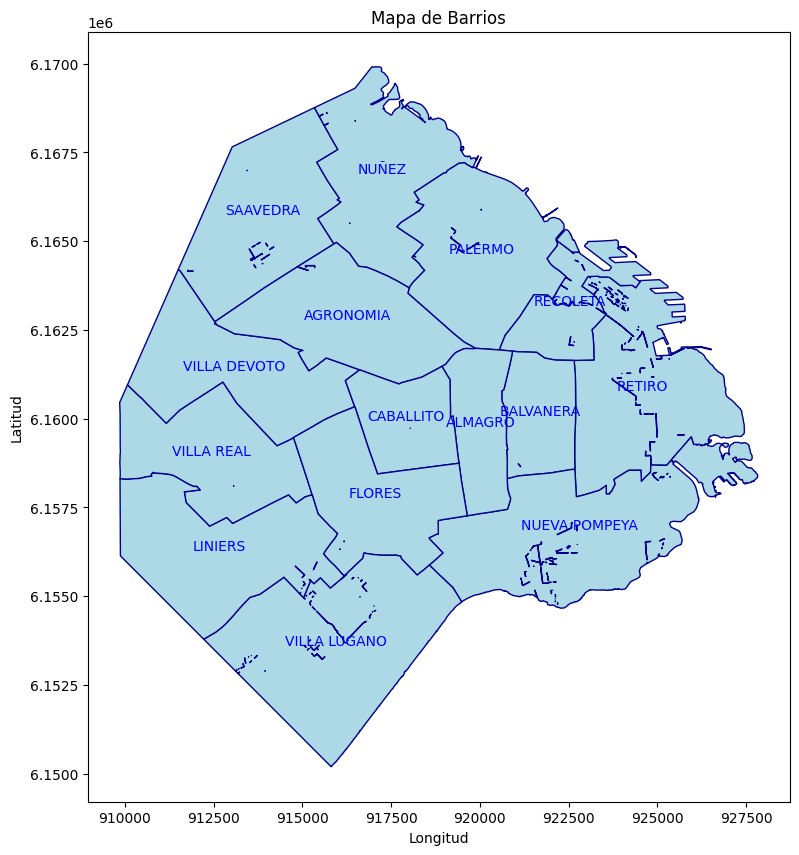

In [66]:
#  Grafica los polígonos
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
comunas.plot(ax=ax, color="lightblue", edgecolor="darkblue")

# Re-proyecta a un CRS proyectado (por ejemplo, UTM zona 20S, EPSG:32720)
comunas = comunas.to_crs("EPSG:32720")
#  Calcula los centroides
comunas["centroid"] = comunas.geometry.centroid


# Paso 5: Añade los nombres de los barrios en los centroides
for idx, row in comunas.iterrows():
    plt.text(
        row["centroid"].x,
        row["centroid"].y,
        row["BARRIO"],
        horizontalalignment="center",
        fontsize=10,
        color="blue",
    )

# Ajusta el aspecto del gráfico
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Mapa de Barrios")
plt.show()

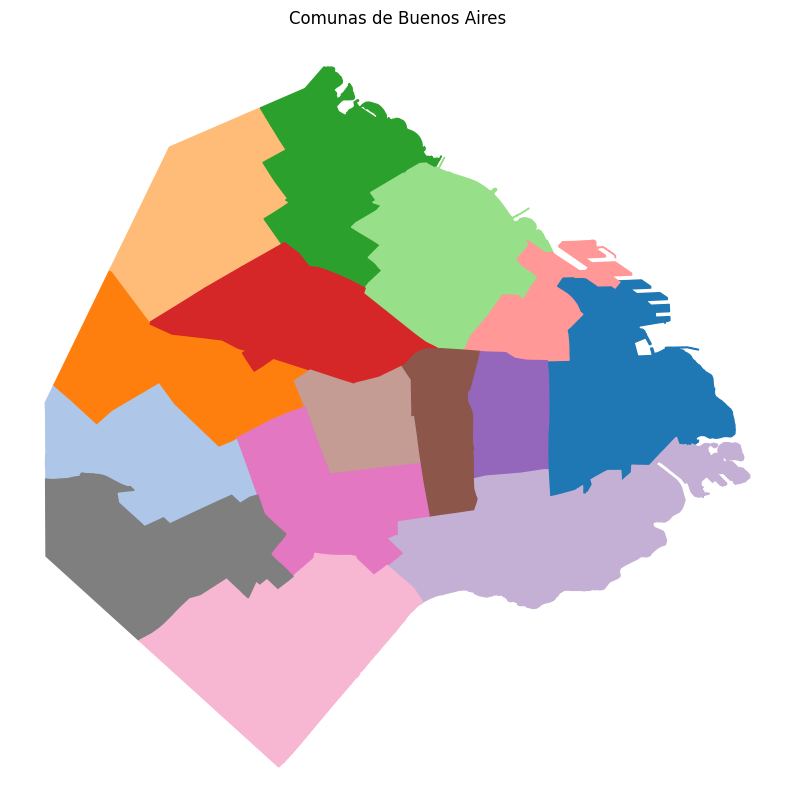

In [67]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Crear un identificador único para cada comuna (en este caso, usamos el índice)
comunas["id_comuna"] = comunas.index

# Generar colores aleatorios para cada comuna
num_comunas = len(comunas)
colors = plt.cm.tab20.colors  # Obtener los colores de la paleta 'tab20'

# Graficar las comunas con colores diferentes
fig, ax = plt.subplots(figsize=(10, 10))
for i, comuna in comunas.iterrows():
    color = colors[
        comuna["id_comuna"] % len(colors)
    ]  # Asignar un color único a cada comuna

    # Manejar MultiPolygon y Polygon
    if comuna["geometry"].geom_type == "Polygon":
        ax.fill(*comuna["geometry"].exterior.xy, color=color)
    elif comuna["geometry"].geom_type == "MultiPolygon":
        for polygon in comuna["geometry"].geoms:
            ax.fill(*polygon.exterior.xy, color=color)

# Personalizar el gráfico
ax.set_title("Comunas de Buenos Aires")
ax.set_axis_off()

plt.show()

In [68]:
#veamos nuestra comuna 11 (Villa Devoto)
#este es un ejemplo de indice real bien utilizado
comuna11 = comunas.loc[11,"geometry"]
#chequeamos el tipo
type(comuna11)

shapely.geometry.polygon.Polygon

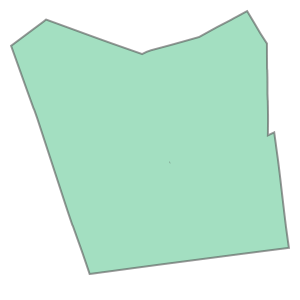

In [69]:
comuna11

In [70]:
radios_metros = radios.to_crs(epsg=3857)

# <font color="#229966">Análisis de Densidad</font>

In [71]:
#obtenemos el area de cada radio censal al extraer 

#la PROPIEDAD geografica área de nuestra columna geometry. Area no lleva () porque es una propiedad, no una funcion. 

# Veremos esto mas adelante.
radios_metros["area_m"] = radios_metros.geometry.area

In [72]:
#como nuestra proyeccion esta en metros y queremos pasarlo a km2, debemos dividir nuestra columna area en metros (area_m) por 1000000
radios_metros["area_km"] = radios_metros.area_m / 1000000

In [73]:
#finalmente dividimos nuestra poblacion por el area en km2
radios_metros["densidad"] = radios_metros.POBLACI / radios_metros.area_km

radios_metros.head()

,BARRIO,COMUNA,POBLACI,VIVIEND,TOTAL_HOGARES,HOGARES_CON_NBI,AREA_KM,geometry,PERIMETRO,NBI,area_m,area_km,densidad
RADIO_I,,,,,,,,,,,,,
1_1_1,RETIRO,1,336.0,82.0,65.0,19.0,1.798997,"POLYGON ((-6497929.484 -4108572.020, -6497943....",17530.094484,29.230769,2.660685e+06,2.660685,126.283256
1_12_1,SAN NICOLAS,1,341.0,365.0,116.0,25.0,0.018565,"POLYGON ((-6499491.512 -4110255.197, -6499471....",661.655424,21.551724,2.746859e+04,0.027469,12414.178936
1_12_10,SAN NICOLAS,1,296.0,629.0,101.0,1.0,0.044380,"POLYGON ((-6498696.826 -4110369.483, -6498543....",1278.061937,0.990099,6.566604e+04,0.065666,4507.657512
1_12_11,SAN NICOLAS,1,528.0,375.0,136.0,7.0,0.366340,"POLYGON ((-6497420.916 -4110414.929, -6497399....",3087.214915,5.147059,5.420509e+05,0.542051,974.078198
1_12_2,SAN NICOLAS,1,229.0,445.0,129.0,16.0,0.018363,"POLYGON ((-6499336.819 -4110244.172, -6499178....",661.734561,12.403101,2.717014e+04,0.027170,8428.368902


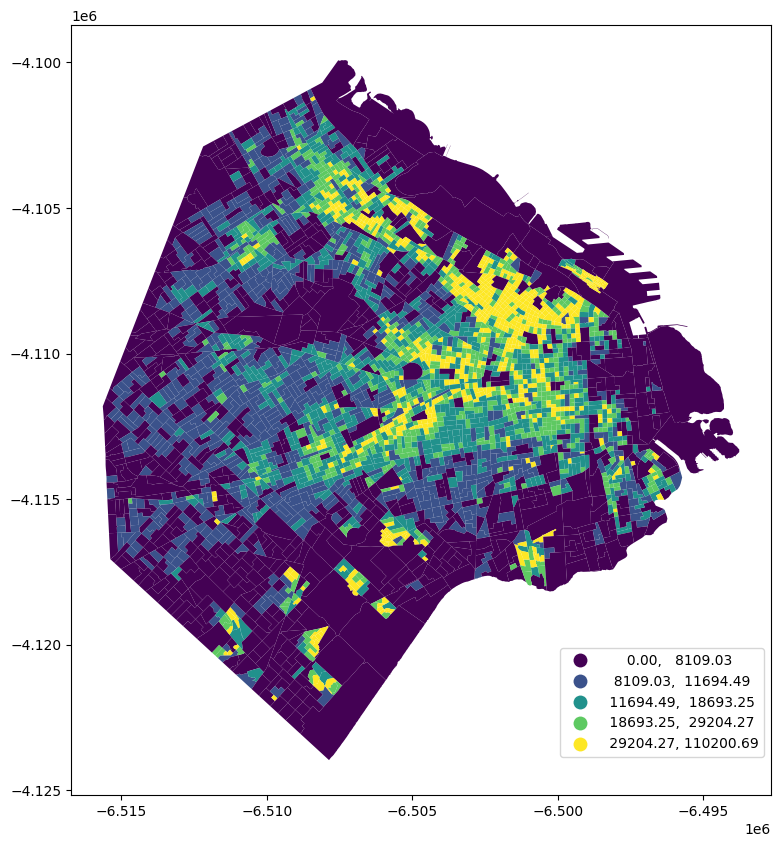

In [74]:


import matplotlib.pyplot as plt

# Supongamos que radios_metros es tu GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# Ploteamos los resultados
radios_metros.plot(column="densidad", scheme="Quantiles", k=5, legend=True, ax=ax)

# Mover la leyenda fuera del gráfico
# Obtén el objeto de la leyenda
legend = ax.get_legend()

# Ajustar la posición de la leyenda
legend.set_bbox_to_anchor((1, 0.2))  # (x, y) coordenadas fuera del gráfico
legend._legend_box.align = "left"

plt.show()

# <font color="#229966">Clusters en estadística espacial</font>

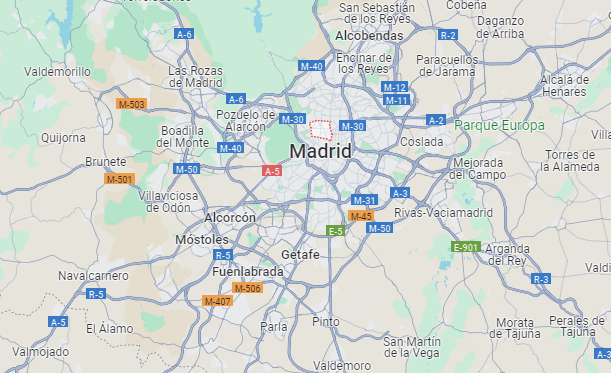


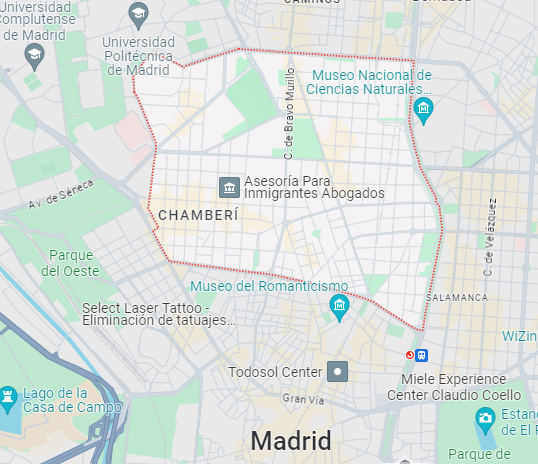

Chamberí es un distrito perteneciente a la ciudad de Madrid y organizado administrativamente en seis barrios. Forma parte de la llamada almendra central de la ciudad, cuenta con una población cercana a los 150.000 habitantes.





In [75]:
#!pip install osmnx

Init 1/10 with method k-means++
Inertia for init 1/10: 10455972.930003328
Init 2/10 with method k-means++
Inertia for init 2/10: 12669827.4900009
Init 3/10 with method k-means++
Inertia for init 3/10: 11029919.359996496
Init 4/10 with method k-means++
Inertia for init 4/10: 12192702.729998944
Init 5/10 with method k-means++
Inertia for init 5/10: 12994670.01000169
Init 6/10 with method k-means++
Inertia for init 6/10: 13749134.299995003
Init 7/10 with method k-means++
Inertia for init 7/10: 14093978.120002914
Init 8/10 with method k-means++
Inertia for init 8/10: 10666431.130000247
Init 9/10 with method k-means++
Inertia for init 9/10: 11033651.5000009
Init 10/10 with method k-means++
Inertia for init 10/10: 9606894.769997358
Minibatch step 1/100: mean batch inertia: 142223.8244117227
Minibatch step 2/100: mean batch inertia: 111708.17485236513, ewa inertia: 111708.17485236513
Minibatch step 3/100: mean batch inertia: 99385.80935649193, ewa inertia: 99385.80935649193
Minibatch step 4/1

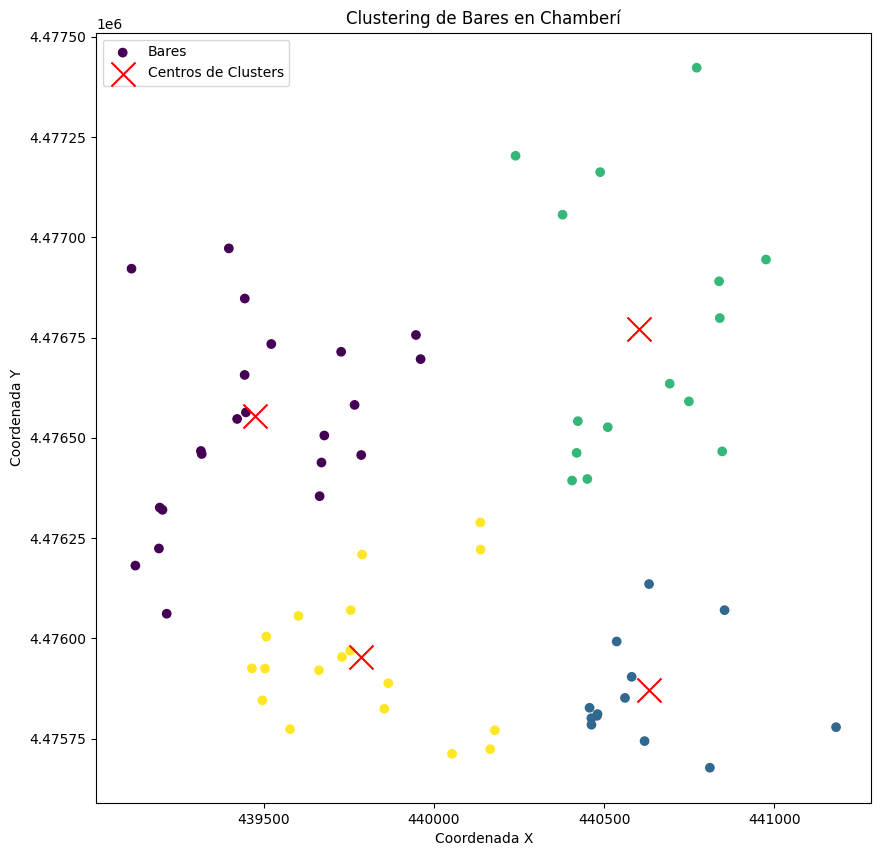

In [77]:
import os
import matplotlib.pyplot as plt
import osmnx as ox
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.cluster import KMeans
from sklearn.utils import parallel_backend
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans  # Asegúrate de importar MiniBatchKMeans
import pickle

# Establecer la variable de entorno para evitar fugas de memoria en Windows
os.environ["OMP_NUM_THREADS"] = "1"

# Mapa del distrito
distrito = ox.graph_from_place("Chamberí, Madrid, Spain", network_type="drive")
streets_graph = ox.projection.project_graph(distrito)

# Reemplazar `get_undirected` con `convert.to_undirected`
streets = ox.graph_to_gdfs(
    ox.convert.to_undirected(streets_graph),
    nodes=False,
    edges=True,
    fill_edge_geometry=True,
)

# Cargar el archivo CSV
puntos = pd.read_csv(DATA_PATH / "mapeado.csv", header=None, names=["coordenadas"])

# Separar las coordenadas en columnas separadas
puntos[["x", "y"]] = puntos["coordenadas"].str.split(";", expand=True)

# Convertir las coordenadas a valores numéricos (float)
puntos["x"] = puntos["x"].astype(float)
puntos["y"] = puntos["y"].astype(float)

# Eliminar la columna original de coordenadas
puntos = puntos.drop(columns=["coordenadas"])

# Definir el tamaño del lote (puedes ajustarlo según la cantidad de puntos)
batch_size = min(2048, len(puntos))  # Asegurarnos de que batch_size sea >= 2048

# Ajuste del modelo MiniBatchKMeans
k = 4  # Número de clusters, puedes ajustarlo según tus necesidades
kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, verbose=1, n_init=10).fit(
    puntos[["x", "y"]]
)

# Guardar el modelo ajustado
pickle.dump(kmeans, open("./minibatchkmeans.bin", "wb"))

# Mostrar los centros de los clusters
print("Centros de los clusters:")
print(kmeans.cluster_centers_)

# Graficar los bares y los clusters
plt.figure(figsize=(10, 10))
plt.scatter(
    puntos["x"],
    puntos["y"],
    c=kmeans.labels_,
    cmap="viridis",
    marker="o",
    label="Bares",
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,
    c="red",
    marker="x",
    label="Centros de Clusters",
)
plt.title("Clustering de Bares en Chamberí")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.legend()
plt.show()

**parallel_backend('threading', n_jobs=1)**:

a) ***parallel_backend***: Esta es una función de scikit-learn que permite cambiar el backend utilizado para operaciones paralelas. Un backend es una forma de gestionar cómo se ejecutan las operaciones en múltiples hilos o procesos.

        
b) ***'threading'***: Este argumento especifica que se debe utilizar el backend de hilos (threads). Los hilos permiten realizar múltiples tareas concurrentemente dentro del mismo proceso.


c) ***n_jobs=1***: Esto especifica que se debe utilizar un solo hilo para ejecutar las operaciones. En otras palabras, se desactiva la paralelización.

d) ***with ...***::
La declaración with es utilizada para crear un contexto de ejecución en Python. Al ingresar a este contexto, se aplica la configuración de backend especificada, y al salir del contexto, se revierte a la configuración de backend anterior.

# <font color="#229966">Diagramas de Voronoi</font>

Los diagramas de Voronoi son una de las estructuras fundamentales dentro de la Geometría Computacional, de alguna forma ellos almacenan toda la información referente a la proximidad entre puntos. Son numerosísimas sus aplicaciones.


En este tema comenzaremos dando una idea intuitiva de lo que es un diagrama de Voronoi plano para a continuación formalizar la definición y dar algunas propiedades básicas. Para finalizar se mencionarán algunos algoritmos para su cálculo. 

La idea del diagrama de Voronoi se basa fundamentalmente en la proximidad. 

Suponemos dado un conjunto finito de puntos en el plano 

<font color="#229966">$$P = \{p_1,...,p_n\}$$ </font>

(con n mayor o igual que dos) y a cada $p_j$ le asociamos aquellos puntos del plano que están más cerca o igual suya que de cualquier otro de los $p_i$ con $i !=j$. 


<font color="#229966">**Todo punto del plano queda así asociado a algún $p_i$**</font>, formándose conjuntos que forman un recubrimiento del plano. 


Existirán puntos que disten lo mismo de dos elementos de P y que <font color="#229966">***formarán la frontera de cada región***</font>. 

Los conjuntos resultantes forman una <font color="#229966">**teselación del plano**</font>, en el sentido de que son exhaustivos (todo punto del plano pertenece a alguno de ellos) y mutuamente excluyentes salvo en sufrontera. 



Llamamos a esta teselación  <font color="#229966">**Diagrama de Voronoi plano (denotado Vor(P))**</font>. 


A cada una de las regiones resultantes las llamaremos  <font color="#229966">**regiones de Voronoi o polígonos de Voronoi (denotado Vor(pi))**</font>. 


Los puntos del conjunto reciben el nombre de <font color="#229966">**generadores del diagrama**</font>.

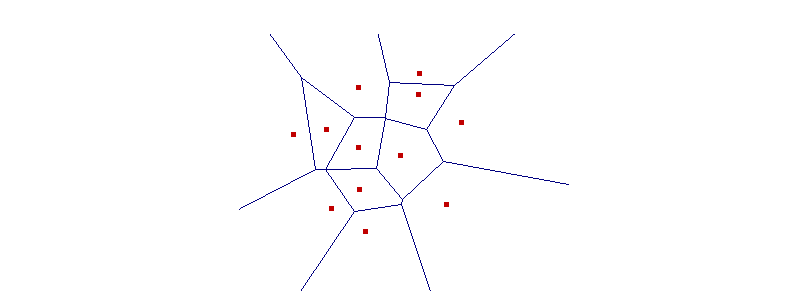

In [78]:
from scipy.spatial import Voronoi, voronoi_plot_2d


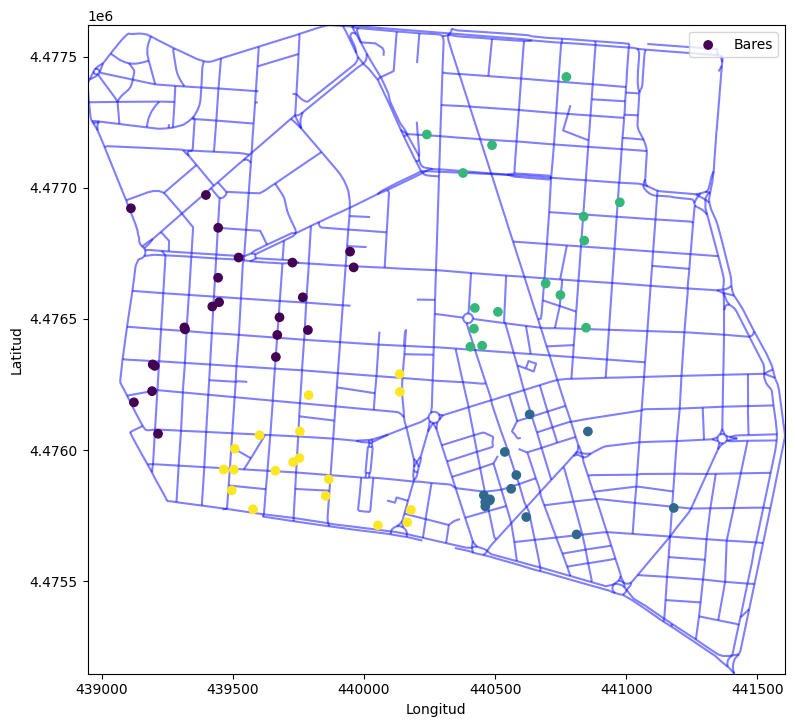

In [79]:
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import geopandas as gpd

#  'streets' y 'puntos' son  datos de calles y puntos de bares respectivamente

# Crear el gráfico
f, ax = plt.subplots(figsize=(9, 9))
xmin, xmax = streets.total_bounds[0], streets.total_bounds[2]
ymin, ymax = streets.total_bounds[1], streets.total_bounds[3]
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
streets.plot(
    ax=ax, color="blue", alpha=0.5, zorder=1
)  # agregar el mapa de calles al gráfico


# Graficar puntos de bares
plt.scatter(
    puntos["x"],
    puntos["y"],
    c=kmeans.labels_,
    cmap="viridis",
    marker="o",
    label="Bares",
)


# Etiqueta y visualización final
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend()  # Agregar leyenda si es necesario
plt.show()

# <font color="#229966">Diagramas de Voronoi </font>

## Son muy útiles  para resolver problemas de proximidad asociados a un conjunto de puntos dado

Dentro de los bordes de una región distinguimos aquellos puntos que pertenecen a tres o más regiones, que llamaremos  <font color="#229966">**vértices**</font>.

Cuando un vértice pertenece a cuatro o más regiones distintas diremos que el diagrama de Voronoi es <font color="#229966">**degenerado**</font>. 

Esto ocurre cuando los generadores correspondientes a cada una de las regiones en las que se encuentra el vértice <font color="#229966">***descansan sobre una misma circunferencia***</font>. 

Esta configuración es <font color="#229966">**muy inestable**</font>, en el sentido de que un pequeño cambio en la posición de cualquiera de los estos generadores ocasiona la aparición de un nuevo borde con dos vértices en el lugar donde estaba el vértice original. 



# <font color="#229966">Algunas Propiedades </font>

## <font color="#229966">Propiedad 1 </font>

Una región de Voronoi es no acotada si y sólo si su generador se encuentra en la frontera de la envolvente convexa.

## <font color="#229966">Propiedad 2 </font>

Un punto q es vérticie de Vor(P) si y sólo si el círculo máximo vacío centrado en q contiene tres o (en el caso de tratarse de un diagrama degenerado) más generadores en su frontera.

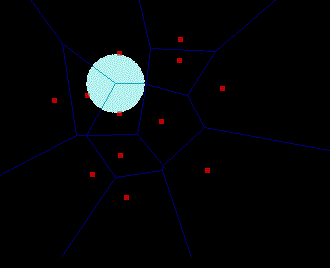
## <font color="#229966">Propiedad 3 </font>

La bisectriz entre dos generadores define un borde de Vor(P) si y sólo si existe un punto q sobre dicha bisectriz tal que el círculo máximo vacío centrado en q contiene solamente a estos dos generadores en su frontera.

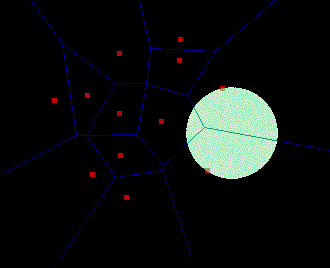

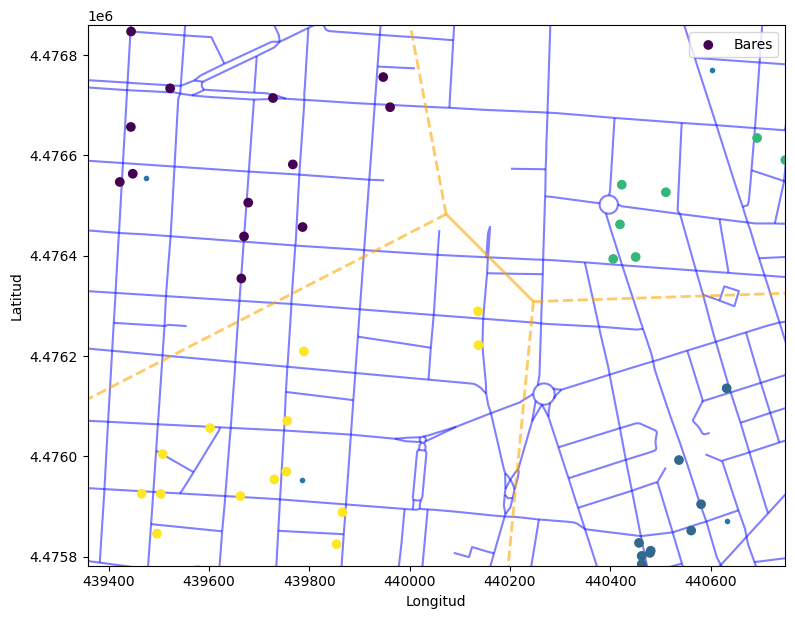

In [80]:
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import geopandas as gpd

# Supongamos que 'streets' y 'puntos' son tus datos de calles y puntos de bares respectivamente

# Crear el gráfico
f, ax = plt.subplots(figsize=(9, 9))
xmin, xmax = streets.total_bounds[0], streets.total_bounds[2]
ymin, ymax = streets.total_bounds[1], streets.total_bounds[3]
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
streets.plot(
    ax=ax, color="blue", alpha=0.5, zorder=1
)  # agregar el mapa de calles al gráfico

# Graficar puntos de bares
plt.scatter(
    puntos["x"],
    puntos["y"],
    c=kmeans.labels_,
    cmap="viridis",
    marker="o",
    label="Bares",
)

# Calcular y graficar el diagrama de Voronoi
centers = kmeans.cluster_centers_
vor = Voronoi(centers)
voronoi_plot_2d(
    vor, ax=ax, show_vertices=False, line_colors="orange", line_width=2, line_alpha=0.6
)

# Etiqueta y visualización final
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend()  # Agregar leyenda si es necesario
plt.show()